# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Import modules

In [134]:
# -*- coding: UTF-8 -*-  
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import pickle
import os
from PIL import Image
import time

%matplotlib inline

### Constants & Settings & Parameters

In [86]:
# Constants
EPOCHS = 60
BATCH_SIZE = 100
IMG_SIZE = 32

### Supported function

In [87]:
def preprocess_data(X):
    """
    Preprocess image data, Normalization, Grayscale
    
    Arguments:
        * X: Image data
        * y: Labels

    Returns:
        * Preprocessed X
    """
  
    # Convert from RGB to grayscale
    X = np.average(X, axis=3)
    X = np.expand_dims(X, axis=3)
    
    # Make all image array values fall within the range -1 to 1
    # Note all values in original images are between 0 and 255, as uint8
    X = X.astype('float32')
    X = (X - 128.) / 128.

    return X

---
## Step 0: Load The Data

In [88]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [90]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

**Randomly choose six images from training set and display them, along with their labels**

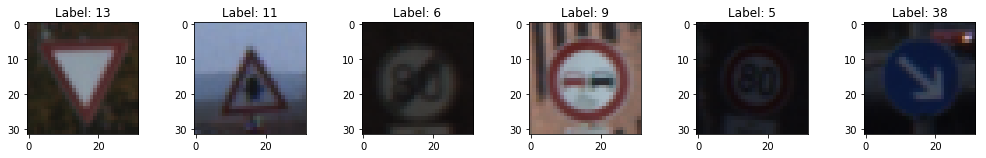

In [91]:
num_images = 6
indices = np.random.choice(list(range(n_train)), size=num_images, replace=False)

# Obtain the images and labels
images = X_train[indices]
labels = y_train[indices]

fig, axs = plt.subplots(1,num_images, figsize=(17, 17))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

# Display samlpe images
for idx, img in enumerate(images):
    axs[idx].set_title('Label: %d' % labels[idx])
    axs[idx].imshow(img)

**Display histogram to show class/label distribution across training data**

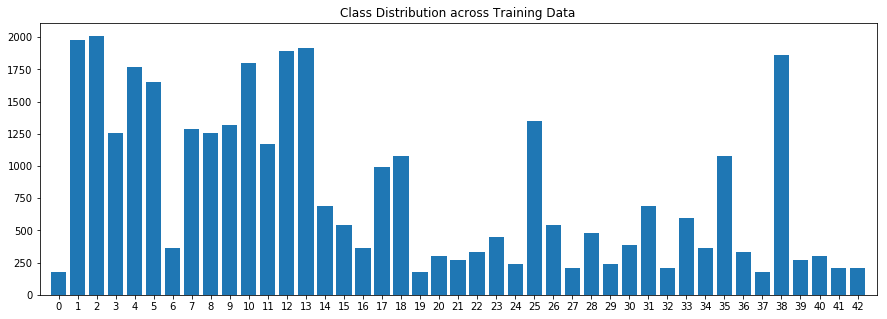

In [92]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

# Count frequency of each label
labels, counts = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution across Training Data')
plt.show()

**Display histogram to show class/label distribution across test data**

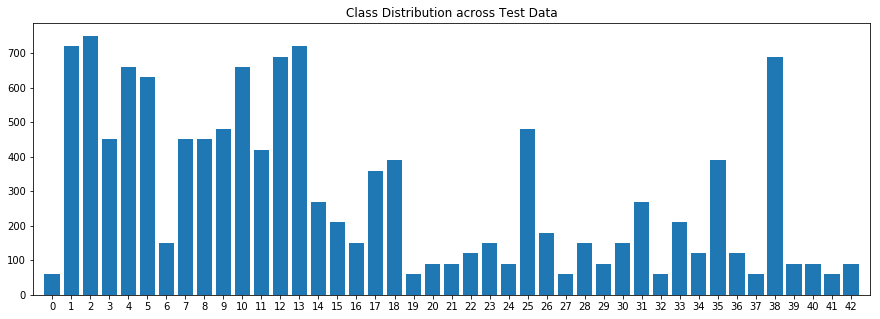

In [93]:
# Count frequency of each label
labels, counts = np.unique(y_test, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution across Test Data')
plt.show()

## Step #1 Remark

We can see both the training and test data are skewed. The only difference is the number of counts for each class. If we wanted to maximize the accuracy on the test set, it does not make sense to balance the class distribution on the training set, since the test set is skewed in the same way the training set is skewed. We need to augment data generating.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [94]:
'''
preprocess_data() does the following:
* Mean normalizes the pixel values of the images and grayscale
'''
X_train_pre = preprocess_data(X_train)
X_valid_pre = preprocess_data(X_valid)
X_test_pre = preprocess_data(X_test)

print("Train data grayscale : ", X_train_pre.shape)
print("Valid data grayscale : ", X_valid_pre.shape)
print("Test data grayscale : ", X_test_pre.shape)

Train data grayscale :  (34799, 32, 32, 1)
Valid data grayscale :  (4410, 32, 32, 1)
Test data grayscale :  (12630, 32, 32, 1)


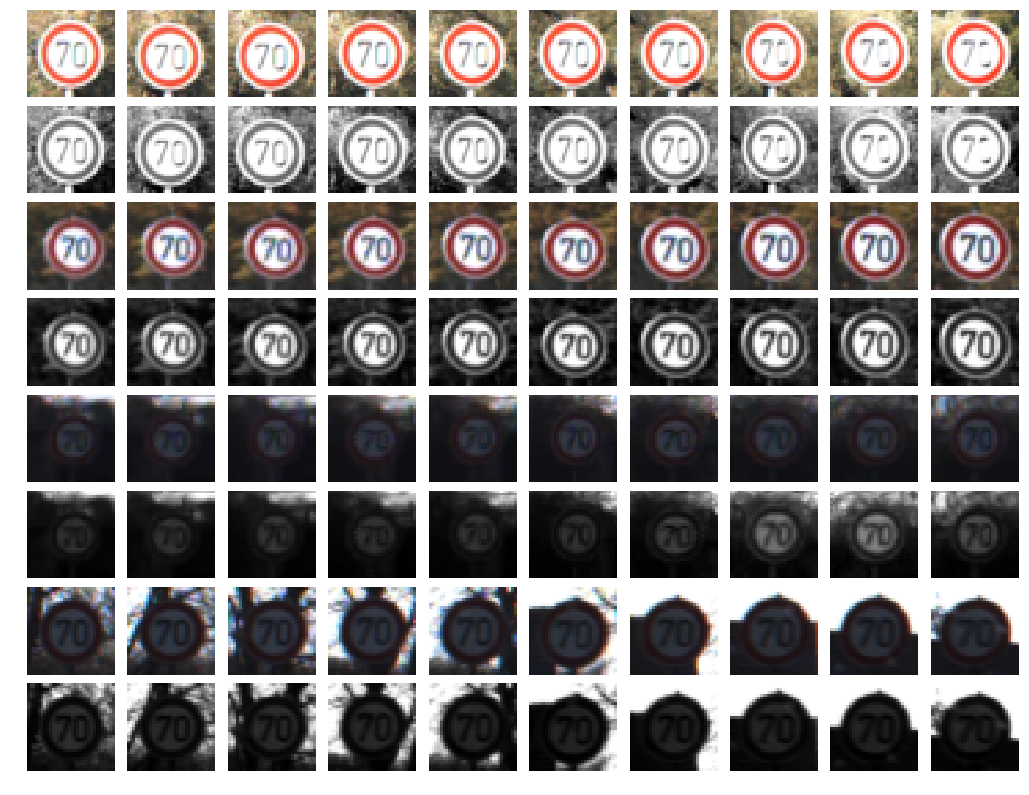

In [10]:
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 8000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_pre[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

Original shape: (34799, 32, 32, 3)
Preprocess shape: (34799, 32, 32, 1)


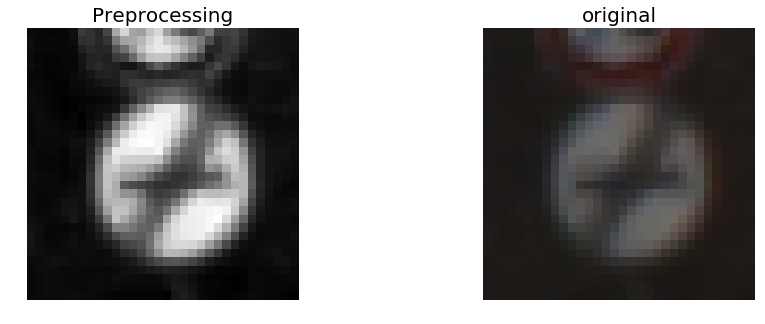

In [95]:
print("Original shape:", X_train.shape)
print("Preprocess shape:", X_train_pre.shape)
fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Preprocessing',fontsize=20)
axs[0].imshow(X_train_pre[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original',fontsize=20)
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

 **Remark : Four functions for augmenting the dataset: random_translate, random_scale, random_warp, and random_brightness**

#1 Random translate

shape in/out: (32, 32, 1) (32, 32, 1)


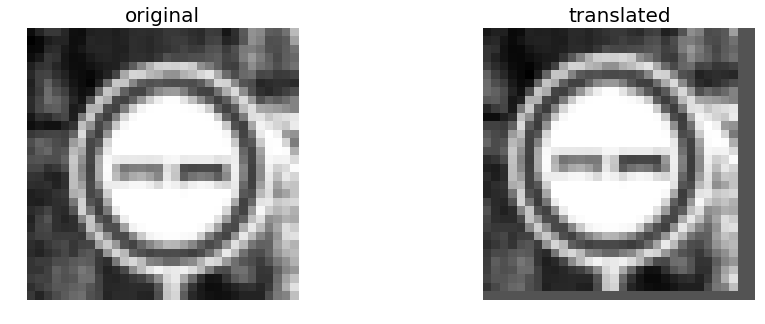

In [96]:
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_pre[11111]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original',fontsize=20)

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated',fontsize=20)

print('shape in/out:', test_img.shape, test_dst.shape)

#2 Random scale

shape in/out: (32, 32, 1) (32, 32, 1)


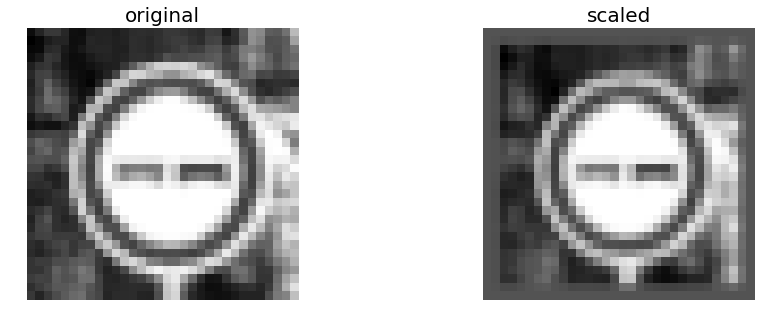

In [97]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original', fontsize=20)

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled', fontsize=20)

print('shape in/out:', test_img.shape, test_dst.shape)

#3 Random_warp

shape in/out: (32, 32, 1) (32, 32, 1)


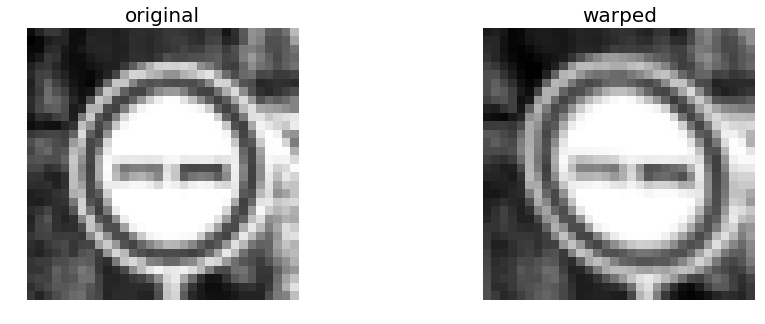

In [98]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original', fontsize=20)

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped', fontsize=20)

print('shape in/out:', test_img.shape, test_dst.shape)

#4 Random Brightness

shape in/out: (32, 32, 1) (32, 32, 1)


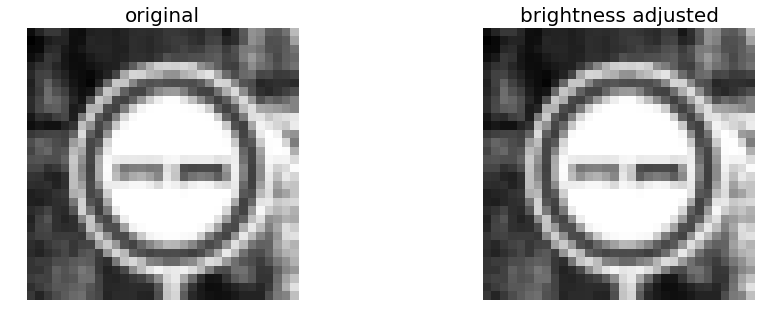

In [99]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original', fontsize=20)

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted', fontsize=20)

print('shape in/out:', test_img.shape, test_dst.shape)

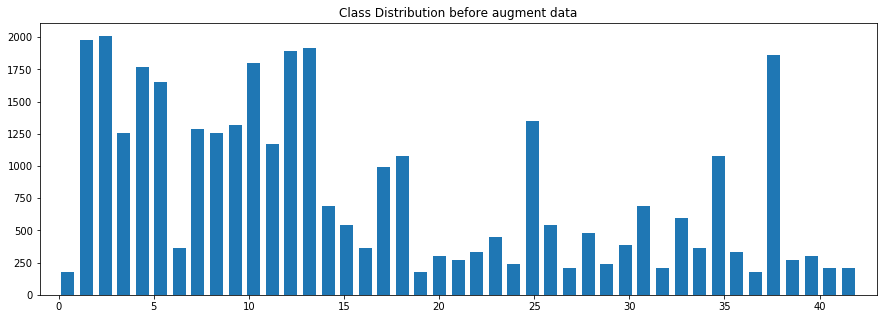

In [100]:
# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)

plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.title('Class Distribution before augment data')
plt.bar(center, hist, align='center', width=width)
plt.show()

In [101]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180


Generate training data (data augmentation)

In [19]:
print('X, y shapes:', X_train_pre.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_pre.shape[0])
            new_img = X_train_pre[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_pre = np.concatenate((X_train_pre, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train_pre.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|
15 : |----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|---
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---
28 : |----|----|----|----|----|----|-
29 : |----|----|----|----|----|----|----|----|----|----|----|
30 : |----|----|----|----|----|----|----|----|
31 : |----|----|
32 : |----|----|----|----|----|----|----|----|----|----|----|-

Save augment training data

In [20]:
train_pickle = {}

train_pickle["X_train"] = X_train_pre
train_pickle["y_train"] = y_train

pickle.dump(train_pickle, open( "../data/train_aug.p", "wb" ) )

Show comparisons of 5 random augmented data points

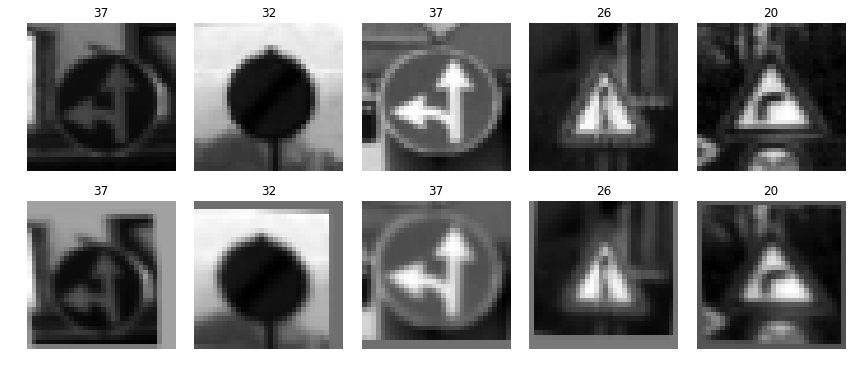

In [105]:
# New X_train dataset generated training data 
train_aug_file = '../data/train_aug.p'

with open(train_aug_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train_pre, y_train = train['X_train'], train['y_train']

choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_pre[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train_pre[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train[output_indices[picks[i]]])

Histogram of label frequency after augment data

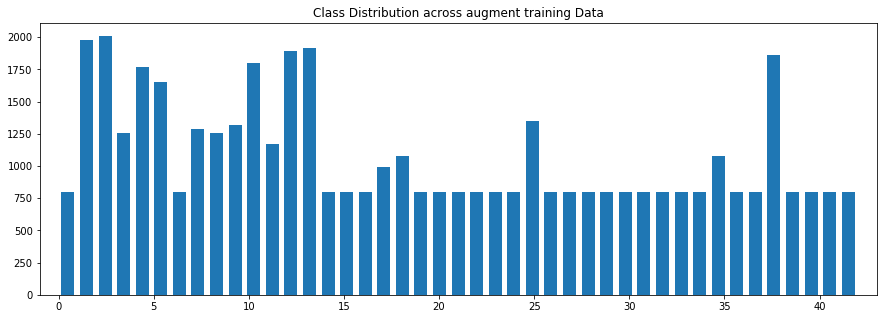

In [106]:
hist, bins = np.histogram(y_train, bins=n_classes)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, align='center', width=width)

plt.title('Class Distribution across augment training Data')
plt.show()

In [107]:
print("New X_train size:",len(X_train_pre))
print("Old X_train size:",len(X_train))

New X_train size: 46480
Old X_train size: 46480


Remark : Data augmentation is the single best method to increase accuracy of the model. Because several classes in the data have far fewer samples than others the model will tend to be biased toward those classes with more samples. I implemented augmentation by creating copies of each sample for a class (sometimes several copies) in order to boost the number of samples for the class to 800 (if that class didn't already have at least 800 samples). Each copy is fed into a "jitter" pipeline that randomly translates, scales, warps, and brightness adjusts the image. I sought to keep the parameters for these transformations relatively conservative and keep the sign in the image recognizable. This was by far the most laborious part of the project, and it takes quite some time to run the code.

### Model Architecture (LeNet5)

In [220]:
def LeNet(X):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Given x shape is (32, 32, 3)
    # Conv and pool layers
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activate function
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation function.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation function.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation function.
    fc2    = tf.nn.relu(fc2)
   
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print("Logits:",logits.get_shape())
    
    
    return logits

### Original LeNet Model Architecture
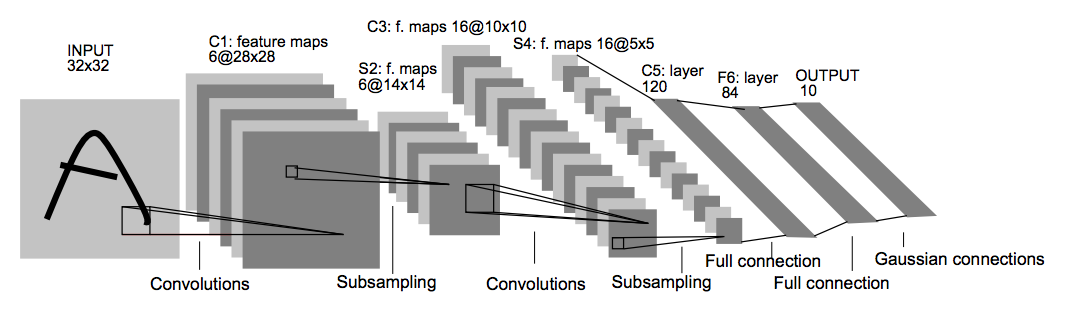

### Modified LeNet Model Architecture

adapted from Sermanet/LeCunn traffic sign classification journal article

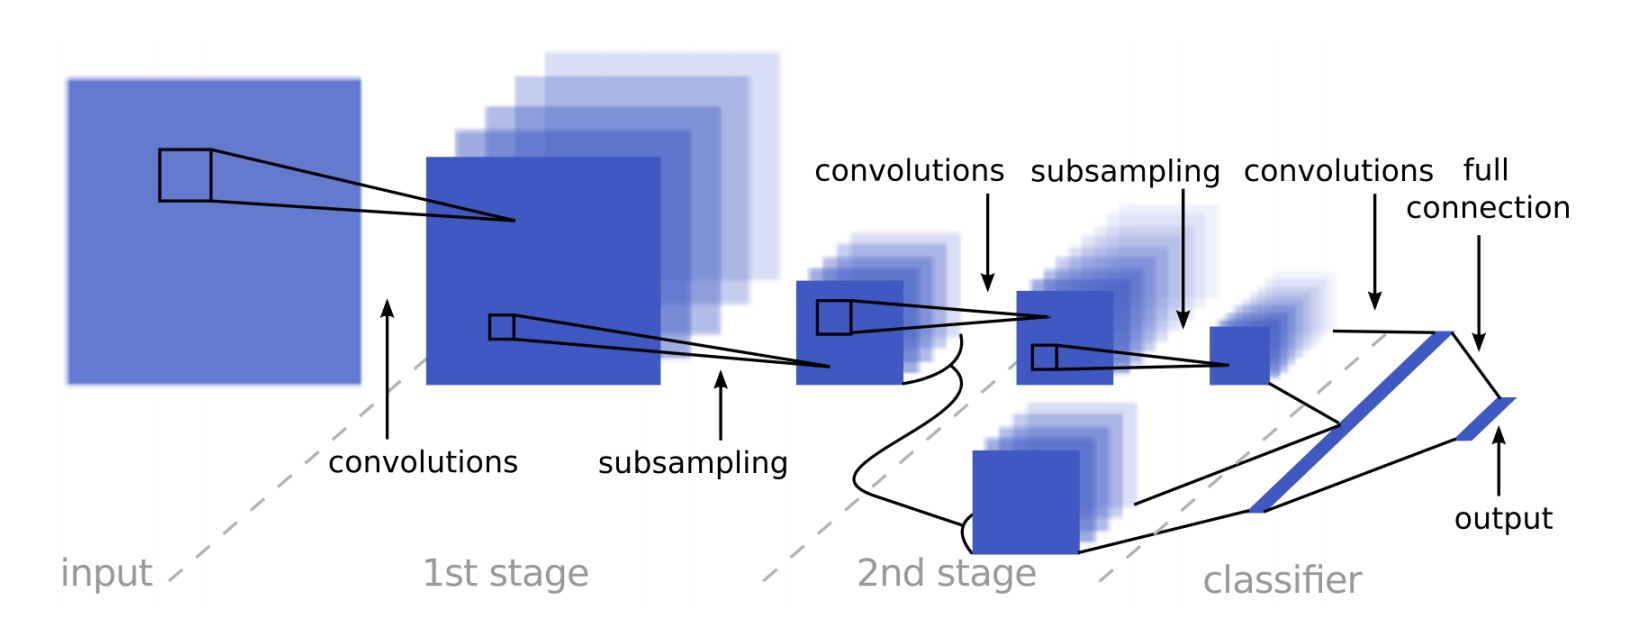

In [221]:
def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.matmul(x, W4) + b4
    print("Logits:",logits.get_shape())


    '''
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b6 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W6), b6)
    '''
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Features and Labels

In [240]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Training the pipeline

In [241]:
# New X_train dataset generated training data 
train_aug_file = '../data/train_aug.p'

with open(train_aug_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train, y_train = train['X_train'], train['y_train']
X_valid = X_valid_pre
X_test = X_test_pre

# Pipeline 
rate = 0.0009

logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)
Logits: (?, 43)


In [242]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, accuracy_operation):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model

In [113]:
accuracy_history = [] 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    # Record time elapsed for performance check
    last_time = time.time()
    train_start_time = time.time()
    
    print("Training...")
    print()
    
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)     

        # Run training on each batch      
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        # Model evaluation
        train_acc = evaluate(X_train, y_train, accuracy_operation)  
        valid_acc = evaluate(X_valid, y_valid, accuracy_operation)
        
        # Record and report train/validation/test accuracies for this epoch
        accuracy_history.append((train_acc, valid_acc))
            
        # Print accuracy every 10 epochs
        if (epoch+1) % 10 == 0 or epoch == 0 or (epoch+1) == EPOCHS:
            print('Epoch %d -- Train acc.: %.4f, Validation acc.: %.4f, Elapsed time: %.2f sec' %\
                (epoch+1, train_acc, valid_acc, time.time() - last_time))
            last_time = time.time()                       

    total_time = time.time() - train_start_time
    print('Total elapsed time: %.2f sec (%.2f min)' % (total_time, total_time/60))
    
    # Save model to disk
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

Epoch 1 -- Train acc.: 0.9025, Validation acc.: 0.8515, Elapsed time: 4.13 sec
Epoch 10 -- Train acc.: 0.9983, Validation acc.: 0.9420, Elapsed time: 35.08 sec
Epoch 20 -- Train acc.: 0.9997, Validation acc.: 0.9605, Elapsed time: 40.48 sec
Epoch 30 -- Train acc.: 0.9998, Validation acc.: 0.9603, Elapsed time: 38.94 sec
Epoch 40 -- Train acc.: 1.0000, Validation acc.: 0.9578, Elapsed time: 38.94 sec
Epoch 50 -- Train acc.: 1.0000, Validation acc.: 0.9603, Elapsed time: 39.49 sec
Epoch 60 -- Train acc.: 1.0000, Validation acc.: 0.9615, Elapsed time: 39.00 sec
Total elapsed time: 236.06 sec (3.93 min)
Model saved


In [243]:
# Now (drumroll) evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_acc = evaluate(X_test, y_test, accuracy_operation)
    print("Test Set Accuracy = {:.3f}".format(test_acc))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.950


Plot training validation accuracies over epochs

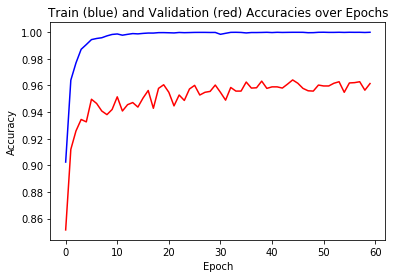

In [276]:
# Transpose accuracy_history
hist = np.transpose(np.array(accuracy_history))
plt.plot(hist[0], 'b')  # training accuracy
plt.plot(hist[1], 'r')  # validation accuracy
plt.title('Train (blue) and Validation (red) Accuracies over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the German Traffice Sign Sample Images

Five pictures of German traffic signs from the web:


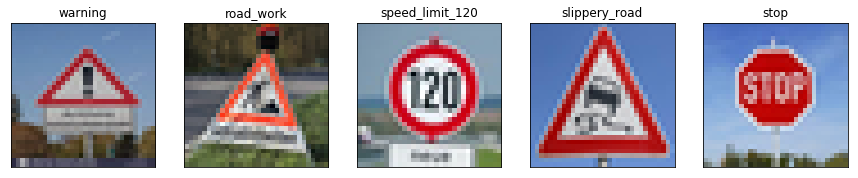

img_set size: (5, 32, 32, 3)


In [259]:
### Load the images and plot them here.
# Import images from folder

img_set = np.ones(shape=(5,32,32,3))
n_test_img = 0
target_img_file_names = []

print('Five pictures of German traffic signs from the web:')

fig = plt.figure(figsize=(15,15))

for img_file in os.listdir("../German_sample_images"): 
    if img_file.endswith(".jpg"):
        # save file name
        target_img_file_names.append(img_file)
        
        # load images and resize it to (32,32,3)
        img = Image.open('../German_sample_images/' + img_file).convert('RGB') # load image into RGB
        img = img.resize((32,32), Image.ANTIALIAS) # resizes image in-place
        
        # append image as (N, 32, 32, 3) 
        img_set[n_test_img,:,:,:] = np.array(img, dtype=np.float32)/1.0
        n_test_img += 1
        
        # Print the names and pictures of the target images
        ax_ = fig.add_subplot(1, 5, n_test_img)
        ax_.imshow(img, cmap="gray")
        ax_.set_title(img_file[:-4])
        ax_.set_xticks([])
        ax_.set_yticks([])

plt.show()
        
# print appended image shape
print('img_set size: ' + str(img_set.shape))

### Predict the Sign Type for Each Image

In [246]:
X_img_test = preprocess_data(img_set)

with tf.Session() as sess:
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    
    predict_type = sess.run(tf.argmax(logits, 1), feed_dict={x: X_img_test, keep_prob: 1.0})

    print(predict_type)

INFO:tensorflow:Restoring parameters from ./lenet
[40 21  8 23 14]


In [247]:
import csv

with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    SignNames = []
    for row in reader:
        csv_ = row['SignName']
        SignNames.append(csv_)

In [248]:
for predict_ind in range(len(predict_type)):
    print('File name: %-025s Predicted name: %s'%(target_img_file_names[predict_ind][:-4] , SignNames[predict_type[predict_ind]]))

File name: warning                   Predicted name: Roundabout mandatory
File name: road_work                 Predicted name: Double curve
File name: speed_limit_120           Predicted name: Speed limit (120km/h)
File name: slippery_road             Predicted name: Slippery road
File name: stop                      Predicted name: Stop


### Analyze Performance

In [249]:
y_new_true = [28, 25, 8, 23, 14] # children crossing (28), road work (25), slibery road(23),  speed limit120 (8) stop (14)

with tf.Session() as sess:
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    test_img_acc = sess.run(accuracy_operation, feed_dict={x: X_img_test, y: y_new_true, keep_prob: 1.0})
    y_new_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: X_img_test, keep_prob: 1.0})
    print('The accuracy for these 5 new images: %.2f' % (test_img_acc))

INFO:tensorflow:Restoring parameters from ./lenet
The accuracy for these 5 new images: 0.60


In [274]:
## test set prediction
with tf.Session() as sess:
    saver4 = tf.train.import_meta_graph('./lenet.meta')
    saver4.restore(sess, "./lenet")
    y_test_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: X_img_test, keep_prob: 1.0})
print(y_test_pred)

INFO:tensorflow:Restoring parameters from ./lenet
[40 21  8 23 14]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


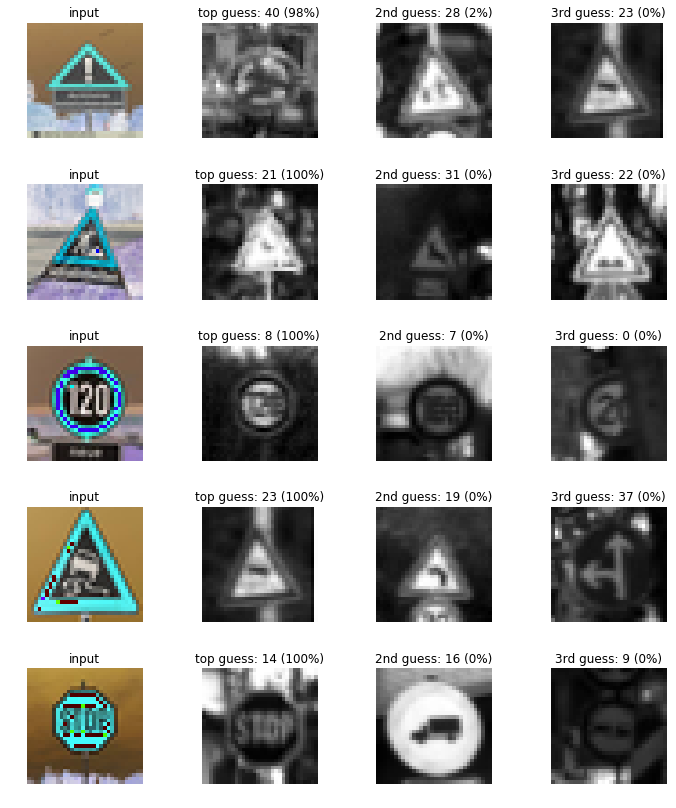

In [263]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")

    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_img_test, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: X_img_test, keep_prob: 1.})    

    fig, axs = plt.subplots(len(X_img_test),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    
    for i, image in enumerate(img_set):
        axs[4*i].axis('off')
        axs[4*i].imshow(image)
        axs[4*i].set_title('input')    
        
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))


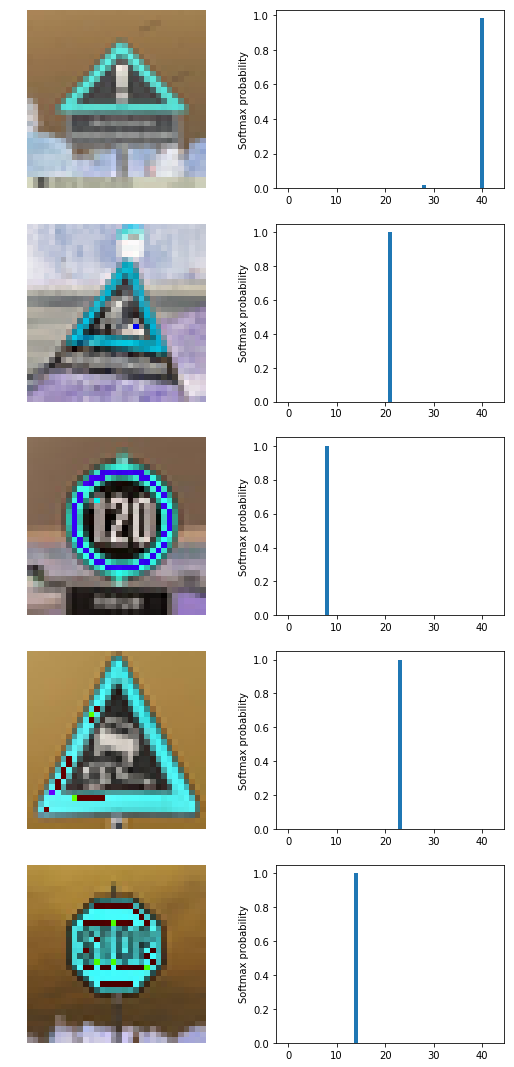

In [258]:
fig, axs = plt.subplots(5,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(img_set[i//2])
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')